In [1]:
pop = read.csv("Canada_census.csv")

In [2]:
pop

X,year,population
<int>,<int>,<int>
1,1851,2436297
2,1861,3229633
3,1871,3689257
4,1881,4324810
5,1891,4833239
6,1901,5371315
7,1911,7206643
8,1921,8787949
9,1931,10376786


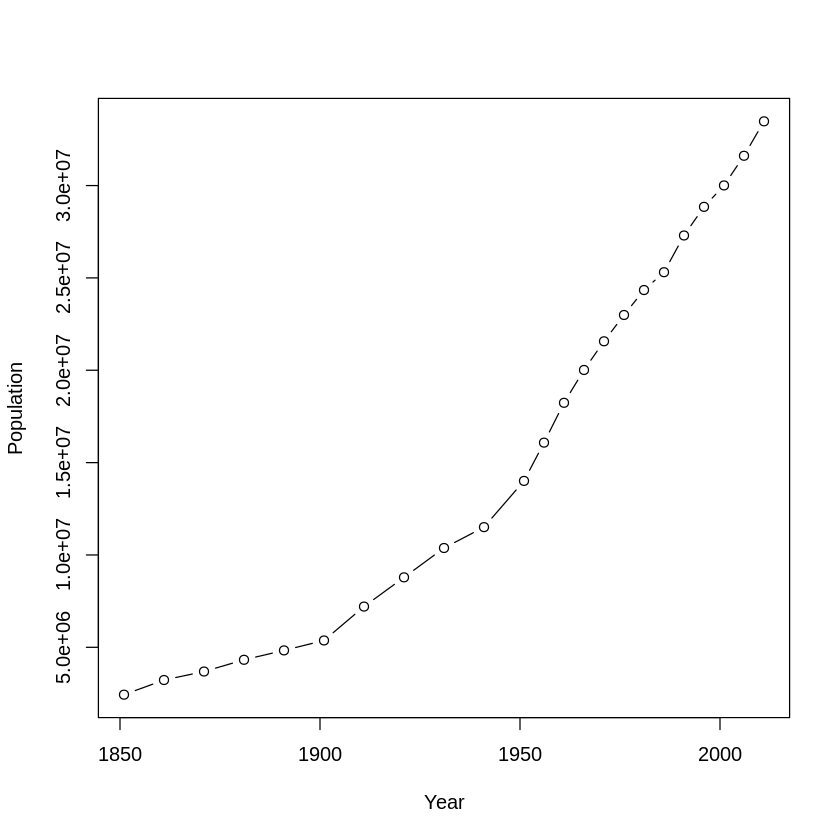

In [3]:
plot(pop$year, pop$population, type = "b", xlab = "Year", ylab = "Population")

In [5]:
y = matrix(data = pop$population, nc = 1)
y

2436297
3229633
3689257
4324810
4833239
5371315
7206643
8787949
10376786
11506655
14009429


In [6]:
A = matrix(data = c(rep(1, dim(pop)[1]),
                    pop$year),
           nc = 2)
A

1,1851
1,1861
1,1871
1,1881
1,1891
1,1901
1,1911
1,1921
1,1931
1,1941
1,1951


In [10]:
ATA = t(A) %*% A
ATA

23,44713
44713,86977653


In [11]:
det(ATA)

[1] 1233650

In [13]:
invATA = solve(ATA)
invATA

70.50431889,-3.624448e-02
-0.03624448,1.864386e-05


In [15]:
ATy = t(A) %*% y
ATy

375559846
740974995011


In [18]:
sol = invATA %*% ATy
sol

-377660589.2
202664.8


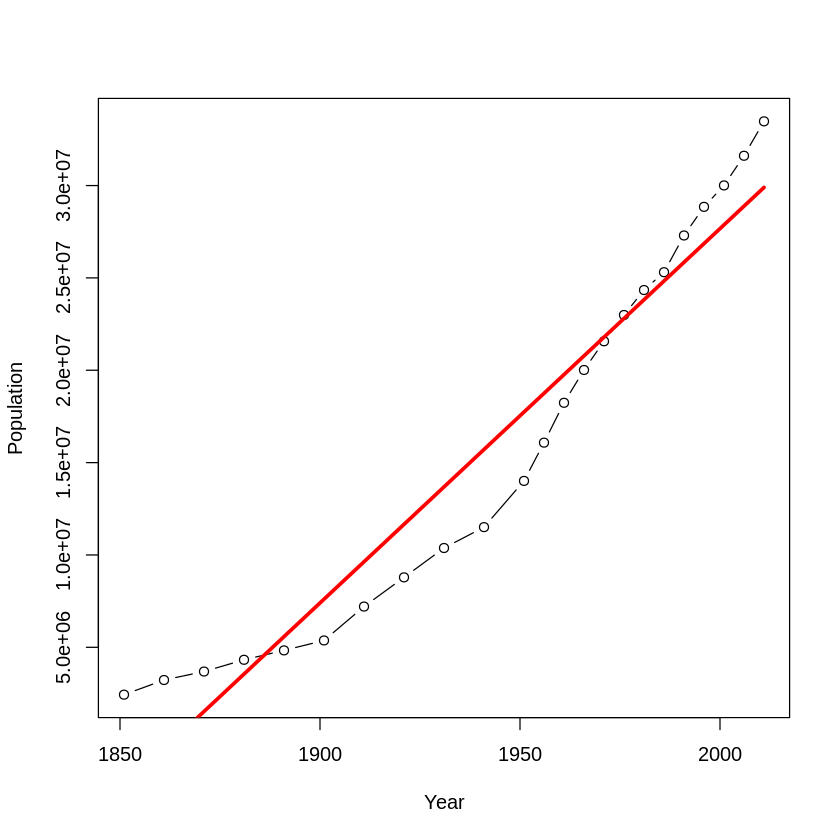

In [19]:
plot(pop$year, pop$population, type = "b", xlab = "Year", ylab = "Population")
lines(pop$year, sol[1]+sol[2]*pop$year, type = "l", col = "red", lwd = 3)

In [20]:
B = matrix(data = c(rep(1, dim(pop)[1]),
                    pop$year,
                   pop$year^2),
           nc = 3)
B

1,1851,3426201
1,1861,3463321
1,1871,3500641
1,1881,3538161
1,1891,3575881
1,1901,3613801
1,1911,3651921
1,1921,3690241
1,1931,3728761
1,1941,3767481
1,1951,3806401


In [22]:
BTB = t(B) %*% B
BTB

23,44713,8.697765e+07
44713,86977653,1.692957e+11
86977653,169295746843,3.297200e+14


In [23]:
det(BTB)

[1] 1.169443e+14

In [24]:
invBTB = solve(BTB)

ERROR: Error in solve.default(BTB): system is computationally singular: reciprocal condition number = 2.05592e-20


In [26]:
pop$year

[1] 1851 1861 1871 1881 1891 1901 1911 1921 1931 1941 1951 1956 1961 1966 1971
[16] 1976 1981 1986 1991 1996 2001 2006 2011

In [27]:
years = pop$year-min(pop$year)
years

[1]   0  10  20  30  40  50  60  70  80  90 100 105 110 115 120 125 130 135 140
[20] 145 150 155 160

In [29]:
C = matrix(data = c(rep(1, dim(pop)[1]),
                    years,
                   years^2),
           nc = 3)
C

1,0,0
1,10,100
1,20,400
1,30,900
1,40,1600
1,50,2500
1,60,3600
1,70,4900
1,80,6400
1,90,8100
1,100,10000


In [31]:
invCTC = solve(t(C) %*% C)
invCTC

4.046823e-01,-9.304410e-03,4.590997e-05
-9.304410e-03,3.054304e-04,-1.739346e-06
4.590997e-05,-1.739346e-06,1.054904e-08


In [33]:
CTy = t(C) %*% y
CTy

3.755598e+08
4.581372e+10
6.033934e+12


In [35]:
sol2 = invCTC %*% CTy
solve(t(C) %*% C, t(C) %*% y)

2730500.544
3442.989
1208.270


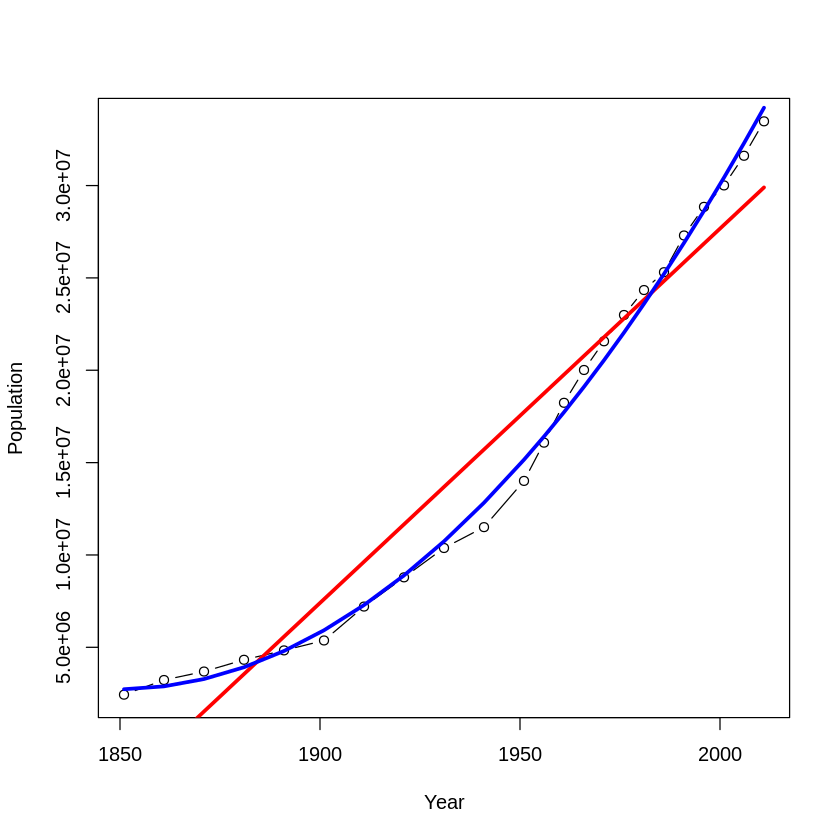

In [37]:
plot(pop$year, pop$population, type = "b", xlab = "Year", ylab = "Population")
lines(pop$year, sol[1]+sol[2]*pop$year, type = "l", col = "red", lwd = 3)
lines(pop$year, sol2[1]+sol2[2]*years+sol2[3]*years^2, type = "l", col = "blue", lwd = 3)

In [38]:
D = matrix(data = c(rep(1, dim(pop)[1]),
                    years,
                   years^2,
                   years^3),
           nc = 4)
D

1,0,0,0
1,10,100,1000
1,20,400,8000
1,30,900,27000
1,40,1600,64000
1,50,2500,125000
1,60,3600,216000
1,70,4900,343000
1,80,6400,512000
1,90,8100,729000
1,100,10000,1000000


In [42]:
sol3 = solve(t(D) %*% D, t(D) %*% y)
sol3

3.227795e+06
-3.823148e+04
1.847533e+03
-2.590445e+00


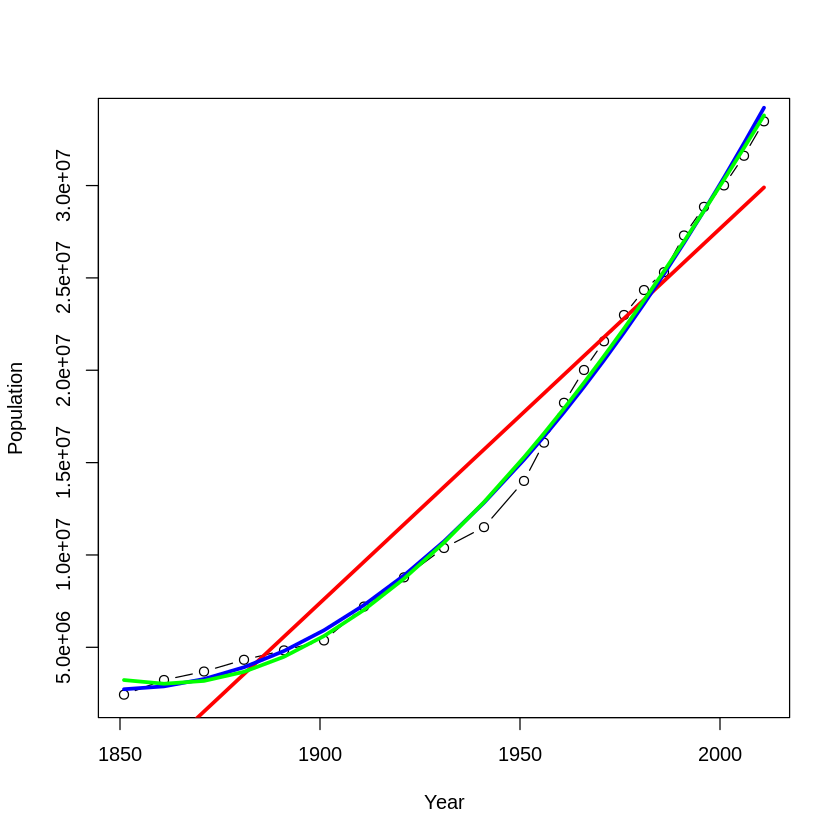

In [43]:
plot(pop$year, pop$population, type = "b", xlab = "Year", ylab = "Population")
lines(pop$year, sol[1]+sol[2]*pop$year, type = "l", col = "red", lwd = 3)
lines(pop$year, sol2[1]+sol2[2]*years+sol2[3]*years^2, type = "l", col = "blue", lwd = 3)
lines(pop$year, sol3[1]+sol3[2]*years+sol3[3]*years^2+sol3[4]*years^3, type = "l", col = "green", lwd = 3)

In [49]:
sol5 = lm(population ~ year, pop)
sol5$coefficients[1]

(Intercept) 
 -377660589

In [62]:
y2 =sol[1]+sol[2]*pop$year
ylim = c(range(y2)[1], max(pop$population))
ylim

[1] -2527954 33477000

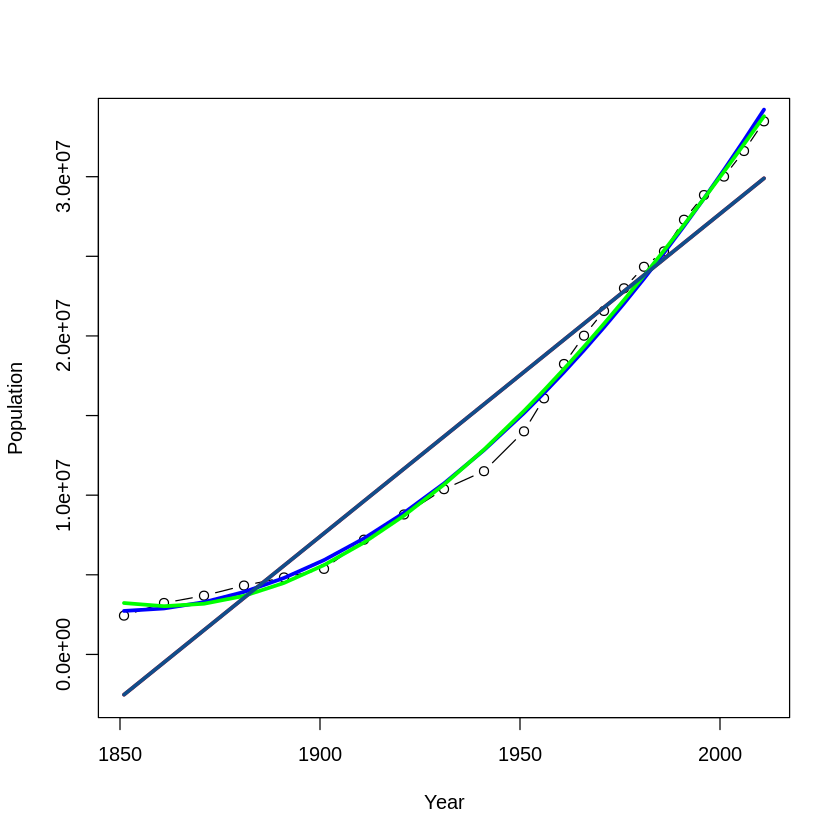

In [63]:
plot(pop$year, pop$population, type = "b", xlab = "Year", ylab = "Population", ylim = ylim)
lines(pop$year, sol[1]+sol[2]*pop$year, type = "l", col = "red", lwd = 3)
lines(pop$year, sol2[1]+sol2[2]*years+sol2[3]*years^2, type = "l", col = "blue", lwd = 3)
lines(pop$year, sol3[1]+sol3[2]*years+sol3[3]*years^2+sol3[4]*years^3, type = "l", col = "green", lwd = 3)
lines(pop$year, as.numeric(sol5$coefficients[1]) + as.numeric(sol5$coefficients[2])* pop$year, type = "l", col = "dodgerblue4", lwd = 3)

In [65]:
sol3[1]+sol3[2]*years+sol3[3]*years^2+sol3[5]*years^3

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA